- 数据集来自: [印象盐城·数创未来大数据竞赛 - 乘用车零售量预测](https://tianchi.aliyun.com/competition/gameList.htm?spm=5176.100068.5610723.7.51b95e86iGh9kB)

In [111]:
# 17.01 / 16.12 产量
6153763 / 6920850

0.88916289184132

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [94]:
train = pd.read_csv('../../raw/CarsSaleForecast/[new] yancheng_train_20171226.csv')
data = pd.read_csv('../../raw/LiChuan/Dec_Basic_feature.csv')

## Pandas 数据探索

In [97]:
# 查看表格整体结构
train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
0,201609,289403,94,12,2,1,1,1,6,MT,...,170,4440,1833,1545,1695,1320,5,2700,1556,1562
1,201609,745137,435,637,3,2,1,2,6,DCT,...,159,4534,1823,1483,1711,1336,5,2648,1553,1544
2,201609,714860,180,831,3,2,2,3,6,AT,...,176,4720,1815,1465,1860,1459,5,2770,1579,1589
3,201609,175962,40,750,3,2,1,4,6,AT,...,155,4475,1706,1469,1625,1145,5,2603,1460,1500
4,201609,270690,19,98,2,3,3,1,5,MT,...,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440


In [98]:
# 查看整体信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20157 entries, 0 to 20156
Data columns (total 32 columns):
sale_date                20157 non-null int64
class_id                 20157 non-null int64
sale_quantity            20157 non-null int64
brand_id                 20157 non-null int64
compartment              20157 non-null int64
type_id                  20157 non-null int64
level_id                 20157 non-null object
department_id            20157 non-null int64
TR                       20157 non-null object
gearbox_type             20157 non-null object
displacement             20157 non-null float64
if_charging              20157 non-null object
price_level              20157 non-null object
price                    20157 non-null object
driven_type_id           20157 non-null int64
fuel_type_id             20157 non-null object
newenergy_type_id        20157 non-null int64
emission_standards_id    20157 non-null int64
if_MPV_id                20157 non-null int64
if_luxur

In [48]:
# 查看控制信息
train.isnull().sum()

sale_date                0
class_id                 0
sale_quantity            0
brand_id                 0
compartment              0
type_id                  0
level_id                 0
department_id            0
TR                       0
gearbox_type             0
displacement             0
if_charging              0
price_level              0
price                    0
driven_type_id           0
fuel_type_id             0
newenergy_type_id        0
emission_standards_id    0
if_MPV_id                0
if_luxurious_id          0
power                    0
cylinder_number          0
engine_torque            0
car_length               0
car_width                0
car_height               0
total_quality            0
equipment_quality        0
rated_passenger          0
wheelbase                0
front_track              0
rear_track               0
dtype: int64

In [100]:
# 对目标 label 进行探索
train.sale_quantity.describe()

count    20157.00000
mean       126.31205
std        231.13742
min          5.00000
25%         16.00000
50%         47.00000
75%        142.00000
max       6284.00000
Name: sale_quantity, dtype: float64

## Pandas 数据操作

In [89]:
train['brand_id']

0         12
1        637
2        831
3        750
4         98
5        537
6        807
7         12
8        638
9         75
10       106
11       450
12       872
13       953
14       985
15       864
16       304
17       831
18       692
19       537
20       761
21       638
22       836
23       750
24       290
25       985
26       637
27       750
28       637
29       537
        ... 
20127    750
20128    831
20129    537
20130    750
20131    638
20132    692
20133    537
20134    783
20135    450
20136    831
20137    750
20138     98
20139    637
20140    761
20141    750
20142    814
20143    814
20144    761
20145    783
20146    638
20147    637
20148    537
20149    450
20150    750
20151    831
20152    750
20153    750
20154    841
20155    537
20156    831
Name: brand_id, Length: 20157, dtype: int64

In [17]:
train.brand_id.unique()

array([ 12, 637, 831, 750,  98, 537, 807, 638,  75, 106, 450, 872, 953,
       985, 864, 304, 692, 761, 836, 290, 783, 814, 497, 813, 923, 512,
       498, 841, 542, 236, 294,  49, 126,  68, 682,  76])

In [ ]:
# SQL 进行 One-hot 编码
DROP TABLE IF EXISTS ycc_sales_lichuan0303_feature_0_onehot;
CREATE TABLE ycc_sales_lichuan0303_feature_0_onehot as
        SELECT class_id,
            case when brand_id=15 then 1.0 else 0.0 end as brand_id_15,
            case when brand_id=18 then 1.0 else 0.0 end as brand_id_18,
            case when brand_id=21 then 1.0 else 0.0 end as brand_id_21,
            case when brand_id=27 then 1.0 else 0.0 end as brand_id_27,
            case when brand_id=30 then 1.0 else 0.0 end as brand_id_30,
            case when brand_id=36 then 1.0 else 0.0 end as brand_id_36,
            case when brand_id=39 then 1.0 else 0.0 end as brand_id_39,
            case when brand_id=42 then 1.0 else 0.0 end as brand_id_42,
            case when brand_id=48 then 1.0 else 0.0 end as brand_id_48,
            case when brand_id=57 then 1.0 else 0.0 end as brand_id_57,
            case when brand_id=60 then 1.0 else 0.0 end as brand_id_60,
            case when brand_id=63 then 1.0 else 0.0 end as brand_id_63,
            case when brand_id=66 then 1.0 else 0.0 end as brand_id_66,
            case when brand_id=69 then 1.0 else 0.0 end as brand_id_69,
            case when brand_id=84 then 1.0 else 0.0 end as brand_id_84,
            case when brand_id=99 then 1.0 else 0.0 end as brand_id_99,
            case when brand_id=102 then 1.0 else 0.0 end as brand_id_102,
            case when brand_id=108 then 1.0 else 0.0 end as brand_id_108,
            case when brand_id=117 then 1.0 else 0.0 end as brand_id_117,
            case when brand_id=123 then 1.0 else 0.0 end as brand_id_123,
            case when brand_id=126 then 1.0 else 0.0 end as brand_id_126,
            case when brand_id=129 then 1.0 else 0.0 end as brand_id_129,
            case when brand_id=132 then 1.0 else 0.0 end as brand_id_132,
            case when brand_id=135 then 1.0 else 0.0 end as brand_id_135,
            case when brand_id=138 then 1.0 else 0.0 end as brand_id_138,
            case when brand_id=141 then 1.0 else 0.0 end as brand_id_141,
            case when brand_id=165 then 1.0 else 0.0 end as brand_id_165,
            case when brand_id=225 then 1.0 else 0.0 end as brand_id_225,
            case when brand_id=237 then 1.0 else 0.0 end as brand_id_237,
            case when brand_id=10 then 1.0 else 0.0 end as brand_id_10,
            case when brand_id=13 then 1.0 else 0.0 end as brand_id_13,
            case when brand_id=16 then 1.0 else 0.0 end as brand_id_16,
            case when brand_id=22 then 1.0 else 0.0 end as brand_id_22,
            case when brand_id=25 then 1.0 else 0.0 end as brand_id_25,
            case when brand_id=28 then 1.0 else 0.0 end as brand_id_28,
            case when brand_id=31 then 1.0 else 0.0 end as brand_id_31,
            case when brand_id=34 then 1.0 else 0.0 end as brand_id_34,
            case when brand_id=37 then 1.0 else 0.0 end as brand_id_37,
            case when brand_id=43 then 1.0 else 0.0 end as brand_id_43,
            case when brand_id=46 then 1.0 else 0.0 end as brand_id_46,
            case when brand_id=49 then 1.0 else 0.0 end as brand_id_49,
            case when brand_id=52 then 1.0 else 0.0 end as brand_id_52,
            case when brand_id=55 then 1.0 else 0.0 end as brand_id_55,
            case when brand_id=58 then 1.0 else 0.0 end as brand_id_58,
            case when brand_id=67 then 1.0 else 0.0 end as brand_id_67,
            case when brand_id=79 then 1.0 else 0.0 end as brand_id_79,
            case when brand_id=82 then 1.0 else 0.0 end as brand_id_82,
            case when brand_id=91 then 1.0 else 0.0 end as brand_id_91,
            case when brand_id=94 then 1.0 else 0.0 end as brand_id_94,
            case when brand_id=100 then 1.0 else 0.0 end as brand_id_100,
            case when brand_id=103 then 1.0 else 0.0 end as brand_id_103,
            case when brand_id=109 then 1.0 else 0.0 end as brand_id_109,
            case when brand_id=121 then 1.0 else 0.0 end as brand_id_121,
            case when brand_id=127 then 1.0 else 0.0 end as brand_id_127,
            case when brand_id=130 then 1.0 else 0.0 end as brand_id_130,
            case when brand_id=133 then 1.0 else 0.0 end as brand_id_133,
            case when brand_id=139 then 1.0 else 0.0 end as brand_id_139,
            case when brand_id=142 then 1.0 else 0.0 end as brand_id_142,
            case when brand_id=145 then 1.0 else 0.0 end as brand_id_145,
            case when brand_id=187 then 1.0 else 0.0 end as brand_id_187,
            case when brand_id=223 then 1.0 else 0.0 end as brand_id_223,
            case when brand_id=229 then 1.0 else 0.0 end as brand_id_229,
            case when brand_id=232 then 1.0 else 0.0 end as brand_id_232,
            case when brand_id=235 then 1.0 else 0.0 end as brand_id_235,
            case when brand_id=238 then 1.0 else 0.0 end as brand_id_238,
            case when brand_id=2 then 1.0 else 0.0 end as brand_id_2,
            case when brand_id=8 then 1.0 else 0.0 end as brand_id_8,
            case when brand_id=11 then 1.0 else 0.0 end as brand_id_11,
            case when brand_id=14 then 1.0 else 0.0 end as brand_id_14,
            case when brand_id=17 then 1.0 else 0.0 end as brand_id_17,
            case when brand_id=23 then 1.0 else 0.0 end as brand_id_23,
            case when brand_id=29 then 1.0 else 0.0 end as brand_id_29,
            case when brand_id=32 then 1.0 else 0.0 end as brand_id_32,
            case when brand_id=35 then 1.0 else 0.0 end as brand_id_35,
            case when brand_id=38 then 1.0 else 0.0 end as brand_id_38,
            case when brand_id=41 then 1.0 else 0.0 end as brand_id_41,
            case when brand_id=47 then 1.0 else 0.0 end as brand_id_47,
            case when brand_id=50 then 1.0 else 0.0 end as brand_id_50,
            case when brand_id=53 then 1.0 else 0.0 end as brand_id_53,
            case when brand_id=56 then 1.0 else 0.0 end as brand_id_56,
            case when brand_id=59 then 1.0 else 0.0 end as brand_id_59,
            case when brand_id=65 then 1.0 else 0.0 end as brand_id_65,
            case when brand_id=68 then 1.0 else 0.0 end as brand_id_68,
            case when brand_id=77 then 1.0 else 0.0 end as brand_id_77,
            case when brand_id=80 then 1.0 else 0.0 end as brand_id_80,
            case when brand_id=83 then 1.0 else 0.0 end as brand_id_83,
            case when brand_id=86 then 1.0 else 0.0 end as brand_id_86,
            case when brand_id=95 then 1.0 else 0.0 end as brand_id_95,
            case when brand_id=98 then 1.0 else 0.0 end as brand_id_98,
            case when brand_id=101 then 1.0 else 0.0 end as brand_id_101,
            case when brand_id=104 then 1.0 else 0.0 end as brand_id_104,
            case when brand_id=110 then 1.0 else 0.0 end as brand_id_110,
            case when brand_id=122 then 1.0 else 0.0 end as brand_id_122,
            case when brand_id=125 then 1.0 else 0.0 end as brand_id_125,
            case when brand_id=134 then 1.0 else 0.0 end as brand_id_134,
            case when brand_id=137 then 1.0 else 0.0 end as brand_id_137,
            case when brand_id=140 then 1.0 else 0.0 end as brand_id_140,
            case when brand_id=143 then 1.0 else 0.0 end as brand_id_143,
            case when brand_id=173 then 1.0 else 0.0 end as brand_id_173,
            case when brand_id=185 then 1.0 else 0.0 end as brand_id_185,
            case when brand_id=200 then 1.0 else 0.0 end as brand_id_200,
            case when brand_id=209 then 1.0 else 0.0 end as brand_id_209,
            case when brand_id=221 then 1.0 else 0.0 end as brand_id_221,
            case when brand_id=227 then 1.0 else 0.0 end as brand_id_227,
            case when brand_id=230 then 1.0 else 0.0 end as brand_id_230,
            case when brand_id=233 then 1.0 else 0.0 end as brand_id_233,
            case when brand_id=236 then 1.0 else 0.0 end as brand_id_236,
            case when brand_id=239 then 1.0 else 0.0 end as brand_id_239,
            case when brand_id=245 then 1.0 else 0.0 end as brand_id_245,
GROUP BY        class_id,brand_id
DISTRIBUTE BY   class_id
SORT BY         class_id
;

## 还要进行 merge 操作
INSERT OVERWRITE TABLE ycc_sales_lichuan0303_feature_0_onehot
SELECT class_id
    ,case when sum(brand_id_15)!= 0 then 1 else 0 end as brand_id_15
    ,case when sum(brand_id_18)!= 0 then 1 else 0 end as brand_id_18
    ,case when sum(brand_id_21)!= 0 then 1 else 0 end as brand_id_21
    ,case when sum(brand_id_27)!= 0 then 1 else 0 end as brand_id_27
    ,case when sum(brand_id_30)!= 0 then 1 else 0 end as brand_id_30
    ,case when sum(brand_id_36)!= 0 then 1 else 0 end as brand_id_36
    ,case when sum(brand_id_39)!= 0 then 1 else 0 end as brand_id_39
    ,case when sum(brand_id_42)!= 0 then 1 else 0 end as brand_id_42
    ,case when sum(brand_id_48)!= 0 then 1 else 0 end as brand_id_48
    ,case when sum(brand_id_57)!= 0 then 1 else 0 end as brand_id_57
    ,case when sum(brand_id_60)!= 0 then 1 else 0 end as brand_id_60
    ,case when sum(brand_id_63)!= 0 then 1 else 0 end as brand_id_63
    ,case when sum(brand_id_66)!= 0 then 1 else 0 end as brand_id_66
    ,case when sum(brand_id_69)!= 0 then 1 else 0 end as brand_id_69
    ,case when sum(brand_id_84)!= 0 then 1 else 0 end as brand_id_84
    ,case when sum(brand_id_99)!= 0 then 1 else 0 end as brand_id_99
    ,case when sum(brand_id_102)!= 0 then 1 else 0 end as brand_id_102
    ,case when sum(brand_id_108)!= 0 then 1 else 0 end as brand_id_108
    ,case when sum(brand_id_117)!= 0 then 1 else 0 end as brand_id_117
    ,case when sum(brand_id_123)!= 0 then 1 else 0 end as brand_id_123
    ,case when sum(brand_id_126)!= 0 then 1 else 0 end as brand_id_126
    ,case when sum(brand_id_129)!= 0 then 1 else 0 end as brand_id_129
    ,case when sum(brand_id_132)!= 0 then 1 else 0 end as brand_id_132
    ,case when sum(brand_id_135)!= 0 then 1 else 0 end as brand_id_135
    ,case when sum(brand_id_138)!= 0 then 1 else 0 end as brand_id_138
    ,case when sum(brand_id_141)!= 0 then 1 else 0 end as brand_id_141
    ,case when sum(brand_id_165)!= 0 then 1 else 0 end as brand_id_165
    ,case when sum(brand_id_225)!= 0 then 1 else 0 end as brand_id_225
    ,case when sum(brand_id_237)!= 0 then 1 else 0 end as brand_id_237
    ,case when sum(brand_id_10)!= 0 then 1 else 0 end as brand_id_10
    ,case when sum(brand_id_13)!= 0 then 1 else 0 end as brand_id_13
    ,case when sum(brand_id_16)!= 0 then 1 else 0 end as brand_id_16
    ,case when sum(brand_id_22)!= 0 then 1 else 0 end as brand_id_22
    ,case when sum(brand_id_25)!= 0 then 1 else 0 end as brand_id_25
    ,case when sum(brand_id_28)!= 0 then 1 else 0 end as brand_id_28
    ,case when sum(brand_id_31)!= 0 then 1 else 0 end as brand_id_31
    ,case when sum(brand_id_34)!= 0 then 1 else 0 end as brand_id_34
    ,case when sum(brand_id_37)!= 0 then 1 else 0 end as brand_id_37
    ,case when sum(brand_id_43)!= 0 then 1 else 0 end as brand_id_43
    ,case when sum(brand_id_46)!= 0 then 1 else 0 end as brand_id_46
    ,case when sum(brand_id_49)!= 0 then 1 else 0 end as brand_id_49
    ,case when sum(brand_id_52)!= 0 then 1 else 0 end as brand_id_52
    ,case when sum(brand_id_55)!= 0 then 1 else 0 end as brand_id_55
    ,case when sum(brand_id_58)!= 0 then 1 else 0 end as brand_id_58
    ,case when sum(brand_id_67)!= 0 then 1 else 0 end as brand_id_67
    ,case when sum(brand_id_79)!= 0 then 1 else 0 end as brand_id_79
    ,case when sum(brand_id_82)!= 0 then 1 else 0 end as brand_id_82
    ,case when sum(brand_id_91)!= 0 then 1 else 0 end as brand_id_91
    ,case when sum(brand_id_94)!= 0 then 1 else 0 end as brand_id_94
    ,case when sum(brand_id_100)!= 0 then 1 else 0 end as brand_id_100
    ,case when sum(brand_id_103)!= 0 then 1 else 0 end as brand_id_103
    ,case when sum(brand_id_109)!= 0 then 1 else 0 end as brand_id_109
    ,case when sum(brand_id_121)!= 0 then 1 else 0 end as brand_id_121
    ,case when sum(brand_id_127)!= 0 then 1 else 0 end as brand_id_127
    ,case when sum(brand_id_130)!= 0 then 1 else 0 end as brand_id_130
    ,case when sum(brand_id_133)!= 0 then 1 else 0 end as brand_id_133
    ,case when sum(brand_id_139)!= 0 then 1 else 0 end as brand_id_139
    ,case when sum(brand_id_142)!= 0 then 1 else 0 end as brand_id_142
    ,case when sum(brand_id_145)!= 0 then 1 else 0 end as brand_id_145
    ,case when sum(brand_id_187)!= 0 then 1 else 0 end as brand_id_187
    ,case when sum(brand_id_223)!= 0 then 1 else 0 end as brand_id_223
    ,case when sum(brand_id_229)!= 0 then 1 else 0 end as brand_id_229
    ,case when sum(brand_id_232)!= 0 then 1 else 0 end as brand_id_232
    ,case when sum(brand_id_235)!= 0 then 1 else 0 end as brand_id_235
    ,case when sum(brand_id_238)!= 0 then 1 else 0 end as brand_id_238
    ,case when sum(brand_id_2)!= 0 then 1 else 0 end as brand_id_2
    ,case when sum(brand_id_8)!= 0 then 1 else 0 end as brand_id_8
    ,case when sum(brand_id_11)!= 0 then 1 else 0 end as brand_id_11
    ,case when sum(brand_id_14)!= 0 then 1 else 0 end as brand_id_14
    ,case when sum(brand_id_17)!= 0 then 1 else 0 end as brand_id_17
    ,case when sum(brand_id_23)!= 0 then 1 else 0 end as brand_id_23
    ,case when sum(brand_id_29)!= 0 then 1 else 0 end as brand_id_29
    ,case when sum(brand_id_32)!= 0 then 1 else 0 end as brand_id_32
    ,case when sum(brand_id_35)!= 0 then 1 else 0 end as brand_id_35
    ,case when sum(brand_id_38)!= 0 then 1 else 0 end as brand_id_38
    ,case when sum(brand_id_41)!= 0 then 1 else 0 end as brand_id_41
    ,case when sum(brand_id_47)!= 0 then 1 else 0 end as brand_id_47
    ,case when sum(brand_id_50)!= 0 then 1 else 0 end as brand_id_50
    ,case when sum(brand_id_53)!= 0 then 1 else 0 end as brand_id_53
    ,case when sum(brand_id_56)!= 0 then 1 else 0 end as brand_id_56
    ,case when sum(brand_id_59)!= 0 then 1 else 0 end as brand_id_59
    ,case when sum(brand_id_65)!= 0 then 1 else 0 end as brand_id_65
    ,case when sum(brand_id_68)!= 0 then 1 else 0 end as brand_id_68
    ,case when sum(brand_id_77)!= 0 then 1 else 0 end as brand_id_77
    ,case when sum(brand_id_80)!= 0 then 1 else 0 end as brand_id_80
    ,case when sum(brand_id_83)!= 0 then 1 else 0 end as brand_id_83
    ,case when sum(brand_id_86)!= 0 then 1 else 0 end as brand_id_86
    ,case when sum(brand_id_95)!= 0 then 1 else 0 end as brand_id_95
    ,case when sum(brand_id_98)!= 0 then 1 else 0 end as brand_id_98
    ,case when sum(brand_id_101)!= 0 then 1 else 0 end as brand_id_101
    ,case when sum(brand_id_104)!= 0 then 1 else 0 end as brand_id_104
    ,case when sum(brand_id_110)!= 0 then 1 else 0 end as brand_id_110
    ,case when sum(brand_id_122)!= 0 then 1 else 0 end as brand_id_122
    ,case when sum(brand_id_125)!= 0 then 1 else 0 end as brand_id_125
    ,case when sum(brand_id_134)!= 0 then 1 else 0 end as brand_id_134
    ,case when sum(brand_id_137)!= 0 then 1 else 0 end as brand_id_137
    ,case when sum(brand_id_140)!= 0 then 1 else 0 end as brand_id_140
    ,case when sum(brand_id_143)!= 0 then 1 else 0 end as brand_id_143
    ,case when sum(brand_id_173)!= 0 then 1 else 0 end as brand_id_173
    ,case when sum(brand_id_185)!= 0 then 1 else 0 end as brand_id_185
    ,case when sum(brand_id_200)!= 0 then 1 else 0 end as brand_id_200
    ,case when sum(brand_id_209)!= 0 then 1 else 0 end as brand_id_209
    ,case when sum(brand_id_221)!= 0 then 1 else 0 end as brand_id_221
    ,case when sum(brand_id_227)!= 0 then 1 else 0 end as brand_id_227
    ,case when sum(brand_id_230)!= 0 then 1 else 0 end as brand_id_230
    ,case when sum(brand_id_233)!= 0 then 1 else 0 end as brand_id_233
    ,case when sum(brand_id_236)!= 0 then 1 else 0 end as brand_id_236
    ,case when sum(brand_id_239)!= 0 then 1 else 0 end as brand_id_239
    ,case when sum(brand_id_245)!= 0 then 1 else 0 end as brand_id_245

FROM ycc_sales_lichuan0303_feature_0_onehot
GROUP BY class_id
;

In [101]:
trainBrand = train[['class_id', 'brand_id']].drop_duplicates()

In [103]:
brand_id_dummies = pd.get_dummies(trainBrand['brand_id'], prefix='brand_id')

In [105]:
## pandas 进行同样的操作
trainBrand = train[['class_id', 'brand_id']].drop_duplicates()
brand_id_dummies = pd.get_dummies(trainBrand['brand_id'], prefix='brand_id')
trainBrand = pd.concat([trainBrand,brand_id_dummies],axis=1)
trainBrand = trainBrand.drop(['brand_id'],axis=1)
trainBrand = trainBrand.groupby('class_id').agg('sum').reset_index()

## Pandas 结合数据可视化

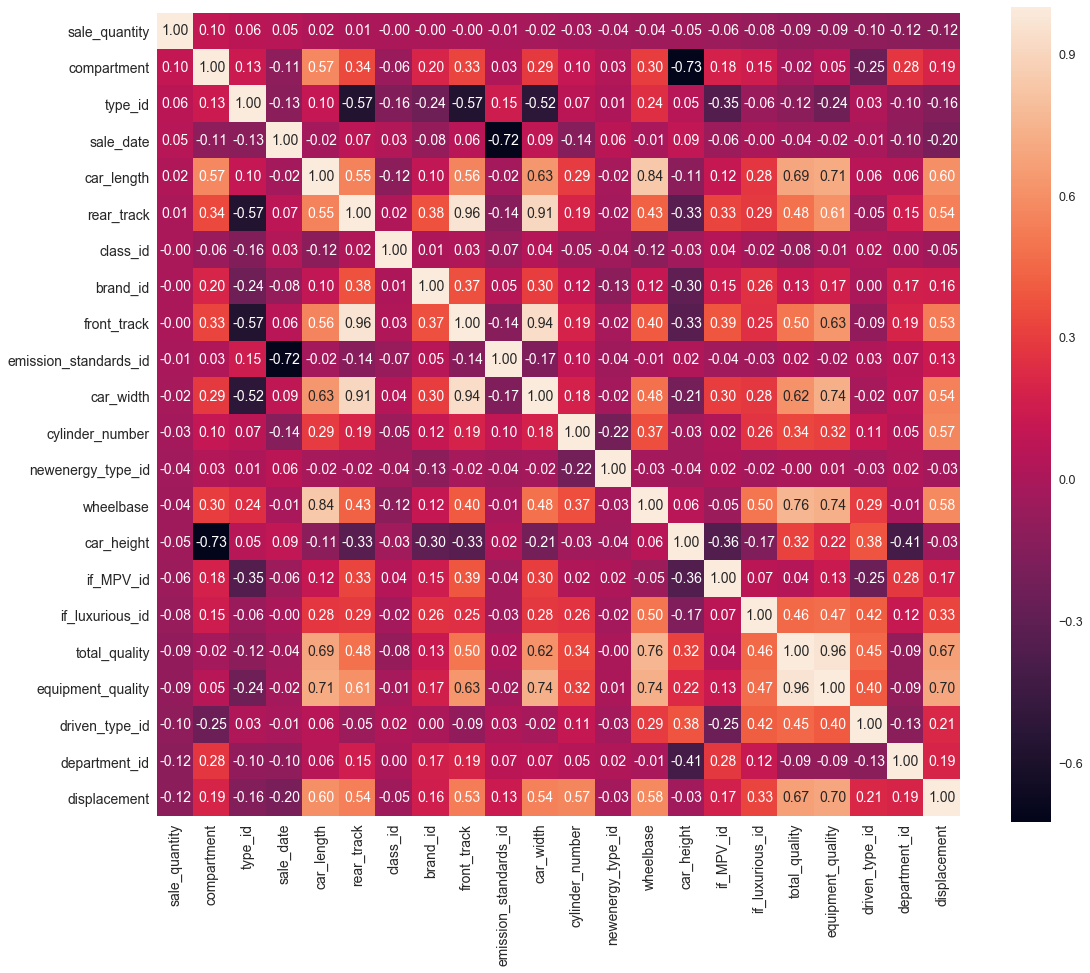

In [107]:
# 未进行数据清洗
# 热力图
k = 20 #number of stdiables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'sale_quantity')['sale_quantity'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=cols.values, xticklabels=cols.values)
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

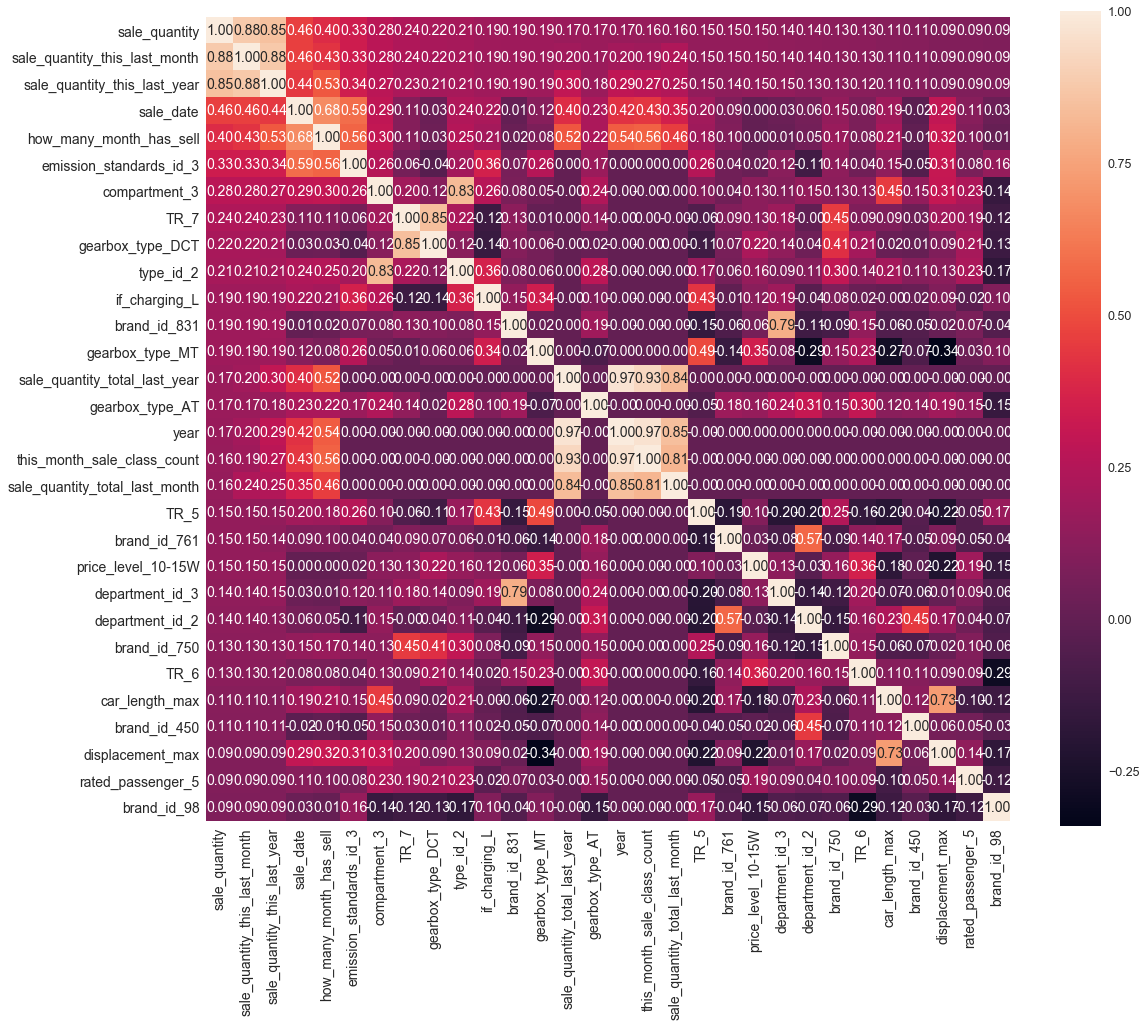

In [109]:
# 数据清洗后
# 热力图
k = 30 #number of stdiables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'sale_quantity')['sale_quantity'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=cols.values, xticklabels=cols.values)
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()